# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("rym_top_5000_all_time.csv")

In [4]:
df

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379
...,...,...,...,...,...,...,...,...,...
4995,4996.0,Gracious!,Gracious,17 July 1970,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32
4996,4997.0,Knights of the Cross,Grave Digger,18 May 1998,"Power Metal, Heavy Metal","history, male vocals, heavy, concept album, an...",3.67,562,11
4997,4998.0,(Listen For) The Rag and Bone Man,And Also the Trees,12 November 2007,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15
4998,4999.0,Hymnen für elektronische und konkrete Klänge,Studio für elektronische Musik des Westdeutsch...,1969,"Musique concrète, Modern Classical, Electronic","avant-garde, sampling, dense, complex, scary, ...",3.65,536,11


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [5]:
df1 = df.groupby(["Artist Name"])['Album'].transform('count')
df1=df[df1 > 5]
df1["mediana"] = df1.groupby("Artist Name")['Average Rating'].transform('median')
df1[["Artist Name","mediana"]]. drop_duplicates().sort_values("mediana", ascending = False).reset_index().iloc[0:10,:]



<ipython-input-5-f251d9f0d87e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["mediana"] = df1.groupby("Artist Name")['Average Rating'].transform('median')


,index,Artist Name,mediana
0,9,David Bowie,4.050
1,7,The Beatles,4.045
2,2,King Crimson,3.970
3,130,The Rolling Stones,3.965
4,17,Black Sabbath,3.950
5,36,Led Zeppelin,3.940
6,1,Pink Floyd,3.910
7,15,John Coltrane,3.905
8,109,Death,3.905
9,0,Radiohead,3.890


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [28]:
df1=df[["Artist Name","Average Rating"]]
df1["max"]=df.groupby(["Artist Name"])['Average Rating'].transform("max")
df1["min"]=df.groupby(["Artist Name"])['Average Rating'].transform("min")
df1["difference"]= df1["max"]-df1["min"]
data2=df1
data1=df1[["Artist Name", "min","max","difference"]].drop_duplicates().sort_values("difference", ascending = False).reset_index()[["Artist Name", "min","max","difference"]].iloc[0:10,:]
data1

<ipython-input-28-fb02cbc01fd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["max"]=df.groupby(["Artist Name"])['Average Rating'].transform("max")
<ipython-input-28-fb02cbc01fd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["min"]=df.groupby(["Artist Name"])['Average Rating'].transform("min")
<ipython-input-28-fb02cbc01fd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Artist Name,min,max,difference
0,Kendrick Lamar,3.52,4.27,0.75
1,The Beatles,3.55,4.25,0.70
2,Pink Floyd,3.60,4.29,0.69
3,My Bloody Valentine,3.58,4.24,0.66
4,King Crimson,3.67,4.30,0.63
5,John Coltrane,3.70,4.30,0.60
6,Radiohead,3.66,4.23,0.57
7,Miles Davis,3.69,4.23,0.54
8,The Cure,3.63,4.17,0.54
9,Kanye West,3.54,4.07,0.53


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [7]:
df["Number of Ratings"] =df["Number of Ratings"].str.replace(',','').astype('int')

In [8]:
df1=df.loc[(df["Number of Ratings"]>=5000)&(df["Number of Reviews"]>=15)]
df1["ratio"]=df["Number of Ratings"]/df["Number of Reviews"]
df1.sort_values("ratio", ascending=False).iloc[0:10,[1,9]]

<ipython-input-8-d6784cc50ae0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ratio"]=df["Number of Ratings"]/df["Number of Reviews"]


,Album,ratio
353,Jenny Death: The Powers That B Disc 2,361.833333
1695,Bury Me at Makeout Creek,308.210526
3733,春と修羅 (Haru to Shura),272.913043
4949,Saturation,251.842857
1036,Saturation III,251.735294
2489,Scenery,248.666667
643,Endless,228.487179
2869,Imperial,225.420000
950,Saturation II,215.552941
439,Bottomless Pit,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [9]:
ratings3Q = df['Number of Ratings'].quantile(q=0.75)
reviews3Q = df['Number of Reviews'].quantile(q=0.75)
df1=df
df1['year'] = pd.DatetimeIndex(pd.to_datetime(df1['Release Date'])).year
df2=df1[df1['Number of Ratings']>ratings3Q]
df2["count"]=df2.groupby(["year"])["Album"].transform("count")
df1=df1[df1['Number of Reviews']>reviews3Q]
df1["count"]=df1.groupby(["year"])["Album"].transform("count")

df2[["year","count"]].drop_duplicates().sort_values("count",ascending=False).head(5)
#B  1994	41, 1971	36, 1970	35, 1996	34, 1995	33
df1[["year","count"]].drop_duplicates().sort_values("count",ascending=False).head(5)
#A  1970	43, 1971	41, 1969	38, 1994	36, 1973	34

<ipython-input-9-5a8907101e31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["count"]=df2.groupby(["year"])["Album"].transform("count")
<ipython-input-9-5a8907101e31>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["count"]=df1.groupby(["year"])["Album"].transform("count")


,year,count
17,1970,43
36,1971,41
2,1969,38
20,1994,36
6,1973,34


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

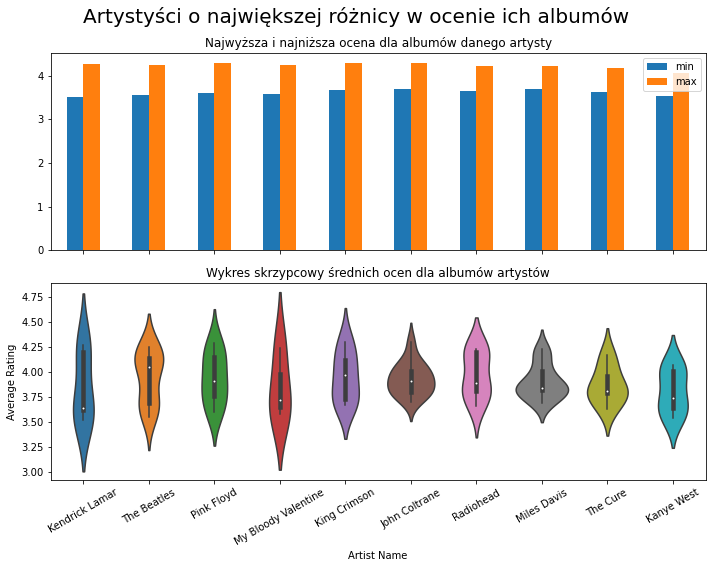

In [68]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,8), sharex=True)
fig.suptitle('Artystyści o największej różnicy w ocenie ich albumów', fontsize=20)
data1.plot(ax=ax1, x="Artist Name", y=["min", "max"], kind="bar", rot=20)
ax1.title.set_text('Najwyższa i najniższa ocena dla albumów danego artysty')
top10=data1["Artist Name"]
data2=data2[data2["Artist Name"].isin(top10)]
sns.violinplot(ax=ax2,x='Artist Name', y='Average Rating', data=data2, order=top10)
plt.xticks(rotation=30)
ax2.title.set_text("Wykres skrzypcowy średnich ocen dla albumów artystów")
plt.tight_layout()
plt.show()

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 